In [0]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTE
from collections import Counter

In [0]:
''' Loading csv file '''
df = pd.read_csv('train.csv')
print(df.head(10))

   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   
5  19       0          5              1          4              0   
6  20       0          2              1          3              1   
7  22       0          5              1          4              0   
8  26       0          5              1          3              1   
9  28       1          1              1          2              0   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin       ...        \
0              0              0              1              0       ...         
1              0              0              0              1       ...       

# Checking summary statistics using info() and describe() methods

In [0]:
df.describe(include='all')

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

0    573518
1     21694
Name: target, dtype: int64


Text(0.5,1,'Target class distribution')

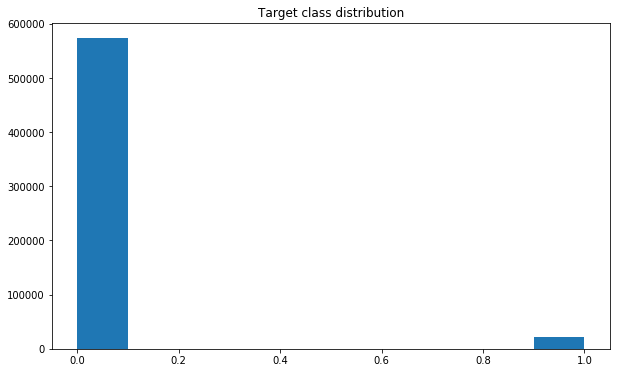

In [0]:
""" counts of each class in 'target' """
print(df.target.value_counts())

plt.figure(figsize=(10,6))
plt.hist(df.target)
plt.title('Target class distribution')

Class is highly imbalanced. Therefore care should be taken before deleting records.<br>
Data augmentation should be performed to build a robust model.

# Null value detection

In [0]:
""" Finding the null values present in each column """
null = {}
for i in df:
    if len(df[df[i]==-1]) > 0:
        null[i] = len(df[df[i]==-1])

for i in null:
    print(i, null[i])

ps_ind_02_cat 216
ps_ind_04_cat 83
ps_ind_05_cat 5809
ps_reg_03 107772
ps_car_01_cat 107
ps_car_03_cat 411231
ps_car_05_cat 266551
ps_car_07_cat 11489
ps_car_09_cat 569
ps_car_11 5
ps_car_12 1
ps_car_14 42620


In [0]:
""" Finding missing values in each columns corresponding to target class 1"""
null_1 = {}
df_1 = df[df['target']==1]
for i in df_1:
    if len(df_1[df_1[i]==-1]) > 0:
        null_1[i] = len(df_1[df_1[i]==-1])

for i in null_1:
    print(i, null_1[i])

ps_ind_02_cat 40
ps_ind_04_cat 33
ps_ind_05_cat 484
ps_reg_03 3060
ps_car_01_cat 34
ps_car_03_cat 13450
ps_car_05_cat 8452
ps_car_07_cat 898
ps_car_09_cat 52
ps_car_14 1723


In [0]:
for i in null_1:
    print(i, np.round(null_1[i]/len(df[df['target']==1]), 3)*100)

ps_ind_02_cat 0.2
ps_ind_04_cat 0.2
ps_ind_05_cat 2.1999999999999997
ps_reg_03 14.099999999999998
ps_car_01_cat 0.2
ps_car_03_cat 62.0
ps_car_05_cat 39.0
ps_car_07_cat 4.1000000000000005
ps_car_09_cat 0.2
ps_car_14 7.9


Columns 'ps_reg_03', 'ps_car_03_cat' and 'ps_car_05_cat' should be dropped because a larger percent of target class 1 has missing values in them.<br>
For the remaining missing values, rows are deleted.<br>
Imputation of values could be done if familiar with the nature of labels, but in this case its not possible.

In [0]:
threshold = 0.1*len(df)

'''dropping columns with missing values greater than threshold '''
for i in null:
    if null[i] > threshold :
        df = df.drop(i, axis=1)

In [0]:
df.shape

(595212, 56)

In [0]:
'''Dropping rows'''
for i in null:
    if null[i] <= threshold :
        df = df[df[i] != -1]

In [0]:
df.shape

(541865, 56)

In [0]:
df.target.value_counts()

0    522715
1     19150
Name: target, dtype: int64

Approximately 10% of both classes in target column are removed.<br>

In [0]:
df.drop('id', inplace=True, axis=1)  #dropping id column as it doesnt contain usrful information

# Grouping features of similar measurement

In [0]:
def feature_type(col):
    '''determining types of features'''
    bin_feat = [] #binary features
    cat_feat = [] #categorical features
    cont_ord = [] #continuous and/or ordinal featurees
    for i in col:
        if i.split('_')[-1] in ['bin']:
            bin_feat.append(i)
        elif i.split('_')[-1] in ['cat']:
            cat_feat.append(i)
        elif i != 'target':
            cont_ord.append(i)
    return bin_feat, cat_feat, cont_ord

bin_feat, cat_feat, cont_ord = feature_type(df.columns)
print("""No of binary features: {}\nNo of categorical features: {}\nNo of continuos/ ordinal features: {}""".format(len(bin_feat), len(cat_feat),len(cont_ord)))

No of binary features: 17
No of categorical features: 12
No of continuos/ ordinal features: 25


In [0]:
for i in cont_ord:
    print(i, 'no:',len(df[i].unique()), 'max:',np.max(df[i]), 'min',np.min(df[i]))

ps_ind_01 no: 8 max: 7 min 0
ps_ind_03 no: 12 max: 11 min 0
ps_ind_14 no: 5 max: 4 min 0
ps_ind_15 no: 14 max: 13 min 0
ps_reg_01 no: 10 max: 0.9 min 0.0
ps_reg_02 no: 19 max: 1.8 min 0.0
ps_car_11 no: 4 max: 3 min 0
ps_car_12 no: 165 max: 1.264911064 min 0.1
ps_car_13 no: 63921 max: 3.124222217 min 0.250619068
ps_car_14 no: 835 max: 0.6363961029999999 min 0.109544512
ps_car_15 no: 15 max: 3.741657387 min 0.0
ps_calc_01 no: 10 max: 0.9 min 0.0
ps_calc_02 no: 10 max: 0.9 min 0.0
ps_calc_03 no: 10 max: 0.9 min 0.0
ps_calc_04 no: 6 max: 5 min 0
ps_calc_05 no: 7 max: 6 min 0
ps_calc_06 no: 11 max: 10 min 0
ps_calc_07 no: 10 max: 9 min 0
ps_calc_08 no: 11 max: 12 min 2
ps_calc_09 no: 8 max: 7 min 0
ps_calc_10 no: 26 max: 25 min 0
ps_calc_11 no: 20 max: 19 min 0
ps_calc_12 no: 11 max: 10 min 0
ps_calc_13 no: 14 max: 13 min 0
ps_calc_14 no: 24 max: 23 min 0


The features which have low number of unique values are taken as ordinal and the rest as continuous

In [0]:
cont_feat = []
ord_feat = []
for i in cont_ord:
    if len(df[i].unique()) > 30:
        cont_feat.append(i)
    else:
        ord_feat.append(i)

# Making inferences from different types of features

In [0]:
''' Distribution of target classes in categorical features '''
for i in cat_feat:
    print(pd.crosstab(df.target, df[i], normalize=True))

ps_ind_02_cat         1         2         3         4
target                                               
0              0.705393  0.194556  0.046122  0.018588
1              0.025669  0.007164  0.001726  0.000782
ps_ind_04_cat         0         1
target                           
0              0.562253  0.402407
1              0.019586  0.015755
ps_ind_05_cat         0         1         2         3         4         5  \
target                                                                      
0              0.866422  0.013385  0.006444  0.013284  0.029568  0.002656   
1              0.029816  0.000637  0.000519  0.000592  0.001583  0.000122   

ps_ind_05_cat         6  
target                   
0              0.032899  
1              0.002072  
ps_car_01_cat        0         1         2        3         4         5   \
target                                                                     
0              0.009993  0.002052  0.003567  0.01091  0.044016  0.027797   
1      

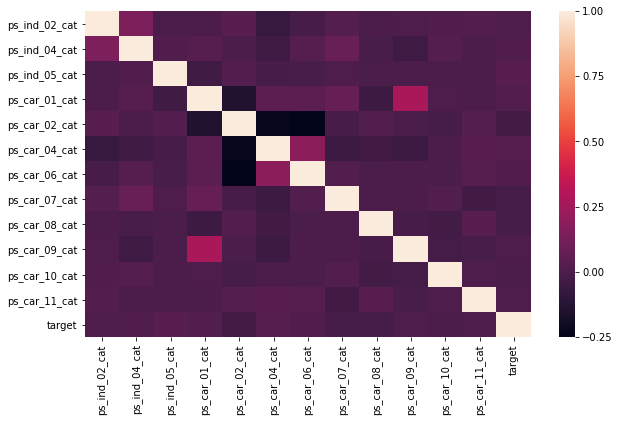

In [0]:
'''Heatmap of categorical features'''
plt.figure(figsize=(10,6))
cat_cols = cat_feat + ['target']
cat_correc = df[cat_cols].corr()
sns.heatmap(cat_correc)

In [0]:
cat_correc['target']

ps_ind_02_cat    0.003246
ps_ind_04_cat    0.010724
ps_ind_05_cat    0.032365
ps_car_01_cat    0.015215
ps_car_02_cat   -0.028094
ps_car_04_cat    0.029346
ps_car_06_cat    0.010958
ps_car_07_cat   -0.020033
ps_car_08_cat   -0.017847
ps_car_09_cat    0.004878
ps_car_10_cat    0.001275
ps_car_11_cat    0.004822
target           1.000000
Name: target, dtype: float64

Correlation heatmap shows that the features are highly uncorrelated to  'target'. 8 categorical features have more than 1% correlation.

In [0]:
''' Distribution of target classes in binary features '''
for i in bin_feat:
    print(pd.crosstab(df.target, df[i], normalize=True))

ps_ind_06_bin         0         1
target                           
0              0.577666  0.386993
1              0.024192  0.011149
ps_ind_07_bin        0         1
target                          
0              0.73202  0.232639
1              0.02429  0.011051
ps_ind_08_bin         0         1
target                           
0              0.803433  0.161227
1              0.028395  0.006946
ps_ind_09_bin         0         1
target                           
0              0.780859  0.183800
1              0.029146  0.006195
ps_ind_10_bin         0         1
target                           
0              0.964364  0.000295
1              0.035324  0.000017
ps_ind_11_bin         0         1
target                           
0              0.963227  0.001432
1              0.035274  0.000066
ps_ind_12_bin         0         1
target                           
0              0.956574  0.008085
1              0.034929  0.000412
ps_ind_13_bin         0         1
target            

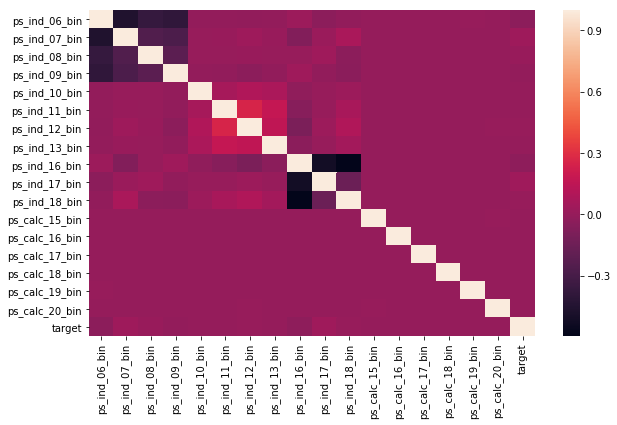

In [0]:
'''Heatmap of binary features'''
plt.figure(figsize=(10,6))
bin_cols = bin_feat + ['target']
bin_correc = df[bin_cols].corr()
sns.heatmap(bin_correc)

In [0]:
bin_correc['target']

ps_ind_06_bin    -0.032330
ps_ind_07_bin     0.030763
ps_ind_08_bin     0.014524
ps_ind_09_bin    -0.007170
ps_ind_10_bin     0.001714
ps_ind_11_bin     0.001887
ps_ind_12_bin     0.006565
ps_ind_13_bin     0.002014
ps_ind_16_bin    -0.026665
ps_ind_17_bin     0.035152
ps_ind_18_bin     0.005406
ps_calc_15_bin   -0.000953
ps_calc_16_bin    0.000627
ps_calc_17_bin   -0.000295
ps_calc_18_bin   -0.000377
ps_calc_19_bin   -0.001585
ps_calc_20_bin   -0.001036
target            1.000000
Name: target, dtype: float64

Binary features have low correlation with 'target'. 5 features have more than 1% correlation.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000A0ACDDBA58>,
      dtype=object)

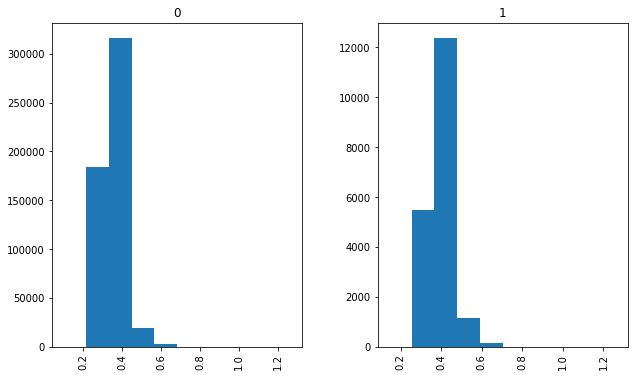

In [0]:
''' Distribution of target classes in continuous features '''

df.hist(column='ps_car_12', by='target', figsize=(10,6))

The distribution of the feature is similar for both classes.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000A0AD239710>,
      dtype=object)

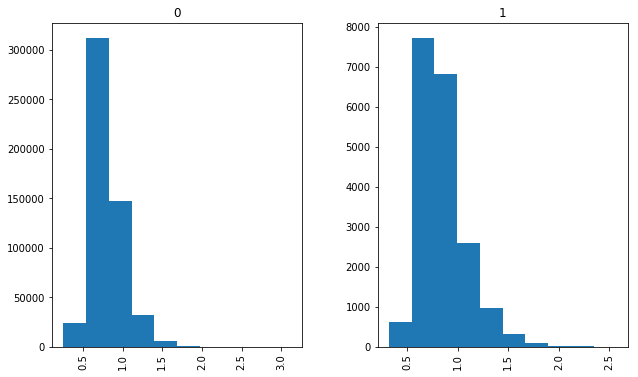

In [0]:
df.hist(column='ps_car_13', by='target', figsize=(10,6))

There is a slight difference in distribution of the feature in separate classes of 'target'.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000A0ACF07898>,
      dtype=object)

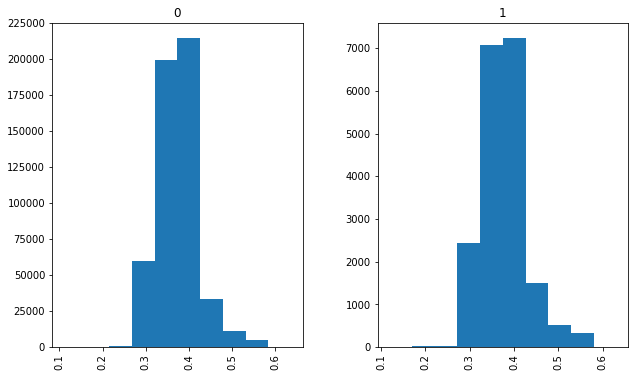

In [0]:
df.hist(column='ps_car_14', by='target', figsize=(10,6))

The distribution of the feature is similar for both classes.

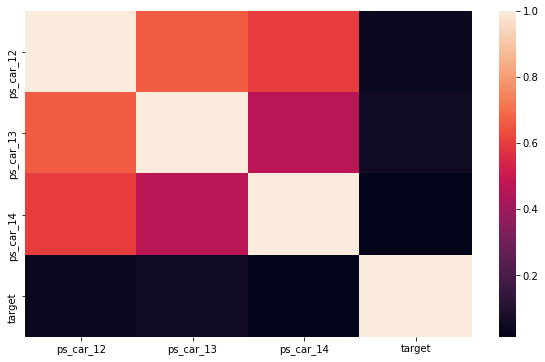

In [0]:
'''Heatmap of continuous features'''
plt.figure(figsize=(10,6))
cont_cols = cont_feat + ['target']
cont_correc = df[cont_cols].corr()
sns.heatmap(cont_correc)

In [0]:
cont_correc['target']

ps_car_12    0.036174
ps_car_13    0.051562
ps_car_14    0.012779
target       1.000000
Name: target, dtype: float64

In [0]:
''' Distribution of target classes in ordinal features '''
for i in ord_feat:
    print(pd.crosstab(df.target, df[i], normalize=True))

ps_ind_01         0         1         2         3         4         5  \
target                                                                  
0          0.296286  0.237838  0.136658  0.083868  0.054314  0.098423   
1          0.009728  0.008068  0.005038  0.003501  0.002499  0.004003   

ps_ind_01         6         7  
target                         
0          0.028974  0.028299  
1          0.001284  0.001220  
ps_ind_03        0         1         2         3         4         5   \
target                                                                  
0          0.018615  0.108885  0.158754  0.135050  0.110077  0.102315   
1          0.001028  0.004082  0.004867  0.004056  0.003709  0.003994   

ps_ind_03        6         7         8         9         10        11  
target                                                                 
0          0.098015  0.085054  0.064671  0.041556  0.023493  0.018172  
1          0.004180  0.003630  0.002558  0.001513  0.000960  0.000764 

ps_calc_12        0         1         2         3         4         5   \
target                                                                   
0           0.228586  0.329422  0.235477  0.114021  0.041815  0.011793   
1           0.008449  0.012044  0.008646  0.004115  0.001524  0.000441   

ps_calc_12        6         7         8         9         10  
target                                                        
0           0.002794  0.000622  0.000105  0.000018  0.000006  
1           0.000102  0.000015  0.000006  0.000000  0.000000  
ps_calc_13        0         1         2         3         4         5   \
target                                                                   
0           0.054364  0.156755  0.225922  0.214662  0.155063  0.088387   
1           0.002061  0.005686  0.008231  0.007860  0.005765  0.003246   

ps_calc_13        6         7        8         9         10        11  \
target                                                                  
0       

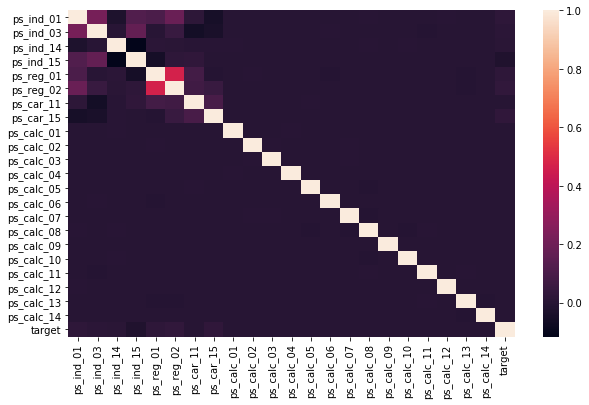

In [0]:
'''Heatmap of ordinal features'''
plt.figure(figsize=(10,6))
ord_cols = ord_feat + ['target']
ord_correc = df[ord_cols].corr()
sns.heatmap(ord_correc)

In [0]:
ord_correc['target']

ps_ind_01     0.019374
ps_ind_03     0.011852
ps_ind_14     0.006332
ps_ind_15    -0.021228
ps_reg_01     0.021986
ps_reg_02     0.032086
ps_car_11    -0.002153
ps_car_15     0.027230
ps_calc_01    0.001536
ps_calc_02    0.001343
ps_calc_03    0.001521
ps_calc_04   -0.001073
ps_calc_05    0.000103
ps_calc_06    0.000684
ps_calc_07   -0.000397
ps_calc_08   -0.001040
ps_calc_09   -0.000140
ps_calc_10    0.001033
ps_calc_11   -0.000376
ps_calc_12   -0.000925
ps_calc_13   -0.000539
ps_calc_14    0.000632
target        1.000000
Name: target, dtype: float64

Correation is wrt to target is low. 6 features have more than 1% correlation.

# Outlier detection using z-score
<br>
Outliers could affect the model parameters and make the model skewed. Therefore outliers are detected using z-score with a threshold of 3, and removed.

In [0]:
df.reset_index(drop=True, inplace=True)
z = np.abs(stats.zscore(df[cont_feat]))
threshold = 3
outlier_row = list(np.unique(np.where(z>threshold)[0]))
print("No of rows containing outliers : {}".format(len(outlier_row)))

No of rows containing outliers : 18678


In [0]:
print(df.loc[outlier_row, 'target'].value_counts())
print(df.loc[outlier_row, 'target'].value_counts()/len(outlier_row))
print(df.target.value_counts())
print(df.target.value_counts()/len(df))

0    17582
1     1096
Name: target, dtype: int64
0    0.941321
1    0.058679
Name: target, dtype: float64
0    522715
1     19150
Name: target, dtype: int64
0    0.964659
1    0.035341
Name: target, dtype: float64


In [0]:
df = df.drop(outlier_row, axis=0) # deleting outliers
df.reset_index(drop=True, inplace=True)

In [0]:
df.shape

(523187, 55)

# Using SMOTE to oversample minority class

In [0]:
oversample = SMOTE(random_state=23, sampling_strategy=12/88.0)
x_old = df[cont_feat + ord_feat + cat_feat + bin_feat]
y_old = df['target']

X, y = oversample.fit_resample(x_old, y_old)

In [0]:
count = dict(Counter(y))
print(count)
print("No of training recordss : {}".format(len(y)))
print("Percentage of minority class : {}".format(np.round(count[1]/(count[1]+count[0]), 2)))

{0: 505133, 1: 68881}
No of training recordss : 574014
Percentage of minority class : 0.12


Number of training records increased to 574k when increasing minority class to 12%. In order to have a balanced dataset, more over sampling is done to further increase minority class count.

In [0]:
oversample = SMOTE(random_state=23)

X, y = oversample.fit_resample(X, y)

In [0]:
count = dict(Counter(y))
print(count)
print("No of training recordss : {}".format(len(y)))
print("Percentage of minority class : {}".format(np.round(count[1]/(count[1]+count[0]), 2)))

{0: 505133, 1: 505133}
No of training recordss : 1010266
Percentage of minority class : 0.5


In [0]:
del df #deleting to free space

In [0]:
X = pd.DataFrame(X, columns=cont_feat + ord_feat + cat_feat + bin_feat)
print(X.head())

   ps_car_12  ps_car_13  ps_car_14  ps_ind_01  ps_ind_03  ps_ind_14  \
0   0.400000   0.883679   0.370810          2          5          0   
1   0.316228   0.618817   0.388716          1          7          0   
2   0.316228   0.641586   0.347275          5          9          0   
3   0.374166   0.542949   0.294958          0          2          0   
4   0.316070   0.565832   0.365103          0          0          0   

   ps_ind_15  ps_reg_01  ps_reg_02  ps_car_11       ...        ps_ind_13_bin  \
0         11        0.7        0.2          2       ...                    0   
1          3        0.8        0.4          3       ...                    0   
2         12        0.0        0.0          1       ...                    0   
3          8        0.9        0.2          1       ...                    0   
4          9        0.7        0.6          3       ...                    0   

   ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_calc_15_bin  \
0              0          

In [0]:
#X.to_pickle('feat_auto.pkl') 
#np.save('target_auto.npy', y) 

# One hot encoding categorical/binary data and scaling continuous/ordinal data.



In [0]:
def ohe(data, col):
  '''One hot encoding'''
  return pd.get_dummies(data, columns=col, drop_first=True)

def std_scaler(data, columns):
  '''Standard Scaler'''
  for i in columns:
    mu = np.mean(data[i])
    sigma = np.std(data[i])
    data[i] = (data[i] - mu)/sigma
  return data

def min_max(data, columns):
  '''Min-Max Scaler'''
  for i in columns:
    min = np.min(data[i])
    max = np.max(data[i])
    data[i] = (data[i]-min)/(max-min)
  return data

One hot encoding is applied to categorical and binary variables.<br>
Standard scaler is used on continuous variables.<br>
Min-Max scaler is used on ordinal variables.

In [0]:
X = ohe(X, cat_feat+bin_feat)
X = std_scaler(X, cont_feat)
X = min_max(X, ord_feat)b

In [0]:
X.to_pickle('features.pkl')

In [0]:
#del X
features = pd.read_pickle('features.pkl')
target = np.load('target_auto.npy')
print(features.shape, len(target))

(1010266, 201) 1010266


# Feature Selection and Dimensionality  reduction 

* Feature selection is the process of selecting a subset of relevant features for use in model construction.
* Dimensional reduction transforms features to lower dimension.

In [0]:
"""Feature selection using RandomForestClassifier"""

rfc = RandomForestClassifier(n_estimators=100)
select_model = SelectFromModel(rfc)
fit = select_model.fit(features, target)
model_features = fit.transform(features)

In [0]:
fit.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [0]:
selected_features = []
for i in range(len(fit.get_support())):
    if fit.get_support()[i]:
        selected_features.append(features.columns[i])
print(selected_features)

['ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_car_11', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_ind_04_cat_1', 'ps_car_02_cat_1', 'ps_car_07_cat_1', 'ps_car_08_cat_1', 'ps_car_09_cat_1', 'ps_car_09_cat_2', 'ps_ind_06_bin_1', 'ps_ind_07_bin_1', 'ps_ind_08_bin_1', 'ps_ind_09_bin_1', 'ps_ind_16_bin_1', 'ps_ind_17_bin_1', 'ps_ind_18_bin_1', 'ps_calc_15_bin_1', 'ps_calc_16_bin_1', 'ps_calc_17_bin_1', 'ps_calc_18_bin_1', 'ps_calc_19_bin_1', 'ps_calc_20_bin_1']


In [0]:
print(model_features.shape)

(1010266, 43)


In [0]:
np.save('model_features.npy', model_features)

Using random forest classification 43 features are selected.

In [0]:
"""Dimensionality reduction using PCA"""

pca = PCA(0.90)
principal_components = pca.fit_transform(features)
principal_df = pd.DataFrame(data = principal_components)
print(principal_df.shape)

(1010266, 60)


In [0]:
principal_df.to_pickle('principal_df.pkl')

In [0]:
#del model_features
#del principal_df

Using PCA dimensions were reduced to 60 from 201.

# Summary of EDA


*   12 columns had missing values. In that 3 columns had high number of missing values, hence were dropped. The rows for the remaining missing values were dropped.
*   After dropping 'id' feature, remaining features were categorized into 12 categorical features, 17 binary features, 3 continuous features and 22 ordinal features.
*   Correlation heatmap of categorical features showed poor correlation between all features.
*   Correlation heatmap of binary features showed poor correlation between most features, but few features have fairly strong correlation.
*   Continuous features having fairly strong correlation between ezch other.
*   Correlation heatmap of ordinal features  showed very poor correaltion between features, but 2 features have moderate correaltion.
*   Outliers were detected using z-score with a threshold of 3. 18k outliers were detected and as it only constitutes <4% of total records, those columns were dropped.
*   The dataset is highly imbalanced with over 97% of majority class.
*   Synthetic Minority Over-Sampling Technique (SMOTE) was used to over sample the minority class and balance the data set.
*   On setting the minority sample to be 12%, 574k total records were obtained. 
*   For better classification minority class was set to be 50%, and 1 million total samplese were obained.
*   For better modelling results, values in the dataframe are modified.
*   One hot encoding is performed for all catgorical features, min-max scaling for ordinal features, and standard scaling for continuous features.
*   In order to reduce dimensions feature selection and PCA were done on copies of the dataset.
*   Feature selection is performed using sklearn's SelectFromModel using RandomForestClassifier as the estimator.
*   After feature selection there were 43 features remaining
*   After PCA (retaining 90% variance) 60 features were remaining.




# Modelling

Splitting the data into train and test

In [0]:
target = np.load('/content/drive/My Drive/Data/auto_insurance/target_auto.npy')
model_features = np.load('/content/drive/My Drive/Data/auto_insurance/model_features.npy')
principal_df = pd.read_pickle('/content/drive/My Drive/Data/auto_insurance/principal_df.pkl')


In [0]:
X_train, X_test, y_train, y_test = train_test_split(model_features, target, test_size=0.3,
                                                    stratify=target, random_state=2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principal_df, target, test_size=0.3,
                                                    stratify=target, random_state=2)

In [0]:
print(X_train.shape, X_test.shape)
print(X_train_pca.shape, X_test_pca.shape)

(707186, 43) (303080, 43)
(707186, 60) (303080, 60)


In [0]:
# Logistic Regression

In [0]:
log_model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = log_model.predict(X_test)
confu_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('confusion matrix :\n', confu_mat)
print('classification matric :\n', class_report)

confusion matrix :
 [[144358   7182]
 [ 17359 134181]]
classification matric :
               precision    recall  f1-score   support

           0       0.89      0.95      0.92    151540
           1       0.95      0.89      0.92    151540

    accuracy                           0.92    303080
   macro avg       0.92      0.92      0.92    303080
weighted avg       0.92      0.92      0.92    303080



In [0]:
max_idx = np.argmax(log_model.coef_)
print('Most important feature : {}'.format(selected_features[max_idx]))

Most important feature : ps_car_09_cat_1


LogisticRegression model is able to achieve an accuracy of 92%, and f1-score of 0.92 on just 42 features.

In [0]:
#Creating model on PCA data
log_model_pca = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)
log_model_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.5, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_pca = log_model_pca.predict(X_test_pca)
confu_mat = confusion_matrix(y_test_pca, y_pred_pca)
class_report = classification_report(y_test_pca, y_pred_pca)
print('confusion matrix :\n', confu_mat)
print('classification matric :\n', class_report)

confusion matrix :
 [[144535   7005]
 [ 16645 134895]]
classification matric :
               precision    recall  f1-score   support

           0       0.90      0.95      0.92    151540
           1       0.95      0.89      0.92    151540

    accuracy                           0.92    303080
   macro avg       0.92      0.92      0.92    303080
weighted avg       0.92      0.92      0.92    303080



Logistic regression model works slightly better on data created from PCA decomposition. Accuray is 92% and f1-score is 0.92.

 # SVM - Linear

In [0]:
linsvc_model = LinearSVC()
params = {'C':[0.1, 1, 10], 'max_iter': [500, 1000, 2000]}
clf = GridSearchCV(linsvc_model, params, cv=5, refit=True, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, max_iter=500 .............................................
[CV] ................. C=0.1, max_iter=500, score=0.916, total=  48.4s
[CV] C=0.1, max_iter=500 .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.4s remaining:    0.0s


[CV] ................. C=0.1, max_iter=500, score=0.917, total=  44.3s
[CV] C=0.1, max_iter=500 .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] ................. C=0.1, max_iter=500, score=0.917, total=  55.6s
[CV] C=0.1, max_iter=500 .............................................
[CV] ................. C=0.1, max_iter=500, score=0.918, total=  47.9s
[CV] C=0.1, max_iter=500 .............................................
[CV] ................. C=0.1, max_iter=500, score=0.917, total=  45.2s
[CV] C=0.1, max_iter=1000 ............................................
[CV] ................ C=0.1, max_iter=1000, score=0.916, total=  54.1s
[CV] C=0.1, max_iter=1000 ............................................
[CV] ................ C=0.1, max_iter=1000, score=0.917, total=  53.2s
[CV] C=0.1, max_iter=1000 ............................................
[CV] ................ C=0.1, max_iter=1000, score=0.917, total=  45.6s
[CV] C=0.1, max_iter=1000 ............................................
[CV] ................ C=0.1, max_iter=1000, score=0.918, total=  44.8s
[CV] C=0.1, max_iter=1000 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 110.0min finished


KeyboardInterrupt: 

In [0]:
print(clf.best_params_) 

{'C': 1, 'max_iter': 1000}


In [0]:
linsvc = LinearSVC(C=1 ,dual=False , max_iter=1000)
linsvc.fit(X_train, y_train)
linsvc_pred = linsvc.predict(X_test)
print('confusion matrix :\n', confusion_matrix(y_test, linsvc_pred))
print('classification report :\n', classification_report(y_test, linsvc_pred))

confusion matrix :
 [[144987   6553]
 [ 18262 133278]]
classification report :
               precision    recall  f1-score   support

           0       0.89      0.96      0.92    151540
           1       0.95      0.88      0.91    151540

    accuracy                           0.92    303080
   macro avg       0.92      0.92      0.92    303080
weighted avg       0.92      0.92      0.92    303080



In [0]:
linsvc_1 = LinearSVC(C=1 ,dual=True , max_iter=1000)#setting dual = True, 
                                                    #prefer dual=False when n_samples>n_features
linsvc_1.fit(X_train, y_train)
linsvc_pred_1 = linsvc_1.predict(X_test)
print('confusion matrix :\n', confusion_matrix(y_test, linsvc_pred_1))
print('classification report :\n', classification_report(y_test, linsvc_pred_1))

confusion matrix :
 [[144986   6554]
 [ 18262 133278]]
classification report :
               precision    recall  f1-score   support

           0       0.89      0.96      0.92    151540
           1       0.95      0.88      0.91    151540

    accuracy                           0.92    303080
   macro avg       0.92      0.92      0.92    303080
weighted avg       0.92      0.92      0.92    303080



Setting dual=True hasnt produced a significant change in the performance of the model.

In [0]:
linsvc_pca = LinearSVC(C=1 ,dual=False , max_iter=1000)
linsvc_pca.fit(X_train_pca, y_train_pca)
linsvc_pred_pca = linsvc_pca.predict(X_test_pca)
print('confusion matrix :\n', confusion_matrix(y_test_pca, linsvc_pred_pca))
print('classification report :\n', classification_report(y_test_pca, linsvc_pred_pca))

confusion matrix :
 [[145177   6363]
 [ 17512 134028]]
classification report :
               precision    recall  f1-score   support

           0       0.89      0.96      0.92    151540
           1       0.95      0.88      0.92    151540

    accuracy                           0.92    303080
   macro avg       0.92      0.92      0.92    303080
weighted avg       0.92      0.92      0.92    303080



LinearSVC model is also slightly improving its performance on pca decomposed data.<br>
Accuracy obtained is 92% and f1-score is 0.92.

# SVM - rbf kernel

In [0]:
X_, y_ = X_train_pca.values[:100000, :], y_train_pca[:100000] #100k training records for svm
print(Counter(y_))

Counter({0: 50008, 1: 49992})


In [0]:
svm_pca = SVC(kernel='rbf', random_state=12)
svm_pca.fit(X_, y_)
svm_pred_pca = svm_pca.predict(X_test_pca)
print('confusion matrix :\n', confusion_matrix(y_test_pca, svm_pred_pca))
print('classification report :\n', classification_report(y_test_pca, svm_pred_pca))

confusion matrix :
 [[147841   3699]
 [ 14039 137501]]
classification report :
               precision    recall  f1-score   support

           0       0.91      0.98      0.94    151540
           1       0.97      0.91      0.94    151540

    accuracy                           0.94    303080
   macro avg       0.94      0.94      0.94    303080
weighted avg       0.94      0.94      0.94    303080



SVM classifier achieved an accuracy of 94% and f1-score of 0.94.

# XGBoost Classification

In [0]:
xgb_clf = xgboost.XGBClassifier(objectve='reg:logistic', colsample_tree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)
xgb_clf.fit(X_train_pca, y_train_pca)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, colsample_tree=0.3,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              objectve='reg:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [0]:
xgb_pred = xgb_clf.predict(X_test_pca)
print('confusion matrix :\n', confusion_matrix(y_test_pca, xgb_pred))
print('classification report :\n', classification_report(y_test_pca, xgb_pred))

confusion matrix :
 [[144764   6776]
 [ 17377 134163]]
classification report :
               precision    recall  f1-score   support

           0       0.89      0.96      0.92    151540
           1       0.95      0.89      0.92    151540

    accuracy                           0.92    303080
   macro avg       0.92      0.92      0.92    303080
weighted avg       0.92      0.92      0.92    303080



XGBoost classifier achieved an accuracy  of 92% and f1-score of 0.92.

# AdaBoost Classifier
XGBoost Classifier as base estimator

In [0]:
xgb_clf = xgboost.XGBClassifier(objectve='binary:logistic', colsample_tree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100, n_jobs=-1)
adb_clf = AdaBoostClassifier(xgb_clf, algorithm='SAMME.R', n_estimators=20, learning_rate=0.01, random_state=23)
adb_clf.fit(X_, y_)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=XGBClassifier(alpha=10, base_score=0.5,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1,
                                                colsample_tree=0.3, gamma=0,
                                                learning_rate=0.1,
                                                max_delta_step=0, max_depth=5,
                                                min_child_weight=1,
                                                missing=None, n_estimators=100,
                                                n_jobs=-1, nthread=None,
                                                objective='binary:logistic',
                                                objectve='binary:logistic',
                  

In [0]:
adb_pred = adb_clf.predict(X_test_pca)
print('confusion matrix :\n', confusion_matrix(y_test_pca, adb_pred))
print('classification report :\n', classification_report(y_test_pca, adb_pred))

confusion matrix :
 [[151540      0]
 [151540      0]]
classification report :
               precision    recall  f1-score   support

           0       0.50      1.00      0.67    151540
           1       0.00      0.00      0.00    151540

    accuracy                           0.50    303080
   macro avg       0.25      0.50      0.33    303080
weighted avg       0.25      0.50      0.33    303080



On boosting xgboost with adaboost, accuracy was reduced to 50% and f1-score was reduced to 0.67, 0. Looks like the classifier is predicting all records as belonging to class 1.

# RandomForest  Classification

In [0]:
rfc = RandomForestClassifier(n_estimators=500, min_samples_split=0.0001, random_state=34, n_jobs=-1,
                            verbose=3)
rfc.fit(X_train_pca, y_train_pca)

In [0]:
rfc_pred = rfc.predict(X_test_pca)
print('confusion matrix :\n', confusion_matrix(y_test_pca, rfc_pred))
print('classification report :\n', classification_report(y_test_pca, rfc_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    3.9s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   16.2s finished


confusion matrix :
 [[148526   3014]
 [ 11763 139777]]
classification report :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    151540
           1       0.98      0.92      0.95    151540

    accuracy                           0.95    303080
   macro avg       0.95      0.95      0.95    303080
weighted avg       0.95      0.95      0.95    303080



RandomForest classifier achieved the highest accuracy as of yet of 95% and f1-score of 0.95 with only 500 trees.

In [0]:
rfc2 = RandomForestClassifier(n_estimators=1000, min_samples_split=0.0001, random_state=34, n_jobs=-1,
                            verbose=3) #increasing the no of tress to 1000
rfc2.fit(X_train_pca, y_train_pca)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 1000building tree 2 of 1000

building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.0min


building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
building tree 45 of 1000
building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000
building tree 50 of 1000
building tree 51 of 1000
building tree 52 of 1000
building tree 53 of 1000
building tree 54 of 1000
building tree 55 of 1000
building tree 56 of 1000
building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000
building tree 64 of 1000
building tree 65 of 1000
building tree 66 of 1000
building tree 67 of 1000


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  8.9min


building tree 124 of 1000
building tree 125 of 1000
building tree 126 of 1000
building tree 127 of 1000
building tree 128 of 1000
building tree 129 of 1000
building tree 130 of 1000
building tree 131 of 1000
building tree 132 of 1000
building tree 133 of 1000
building tree 134 of 1000
building tree 135 of 1000
building tree 136 of 1000
building tree 137 of 1000
building tree 138 of 1000
building tree 139 of 1000
building tree 140 of 1000
building tree 141 of 1000
building tree 142 of 1000
building tree 143 of 1000
building tree 144 of 1000
building tree 145 of 1000
building tree 146 of 1000
building tree 147 of 1000
building tree 148 of 1000
building tree 149 of 1000
building tree 150 of 1000
building tree 151 of 1000
building tree 152 of 1000
building tree 153 of 1000
building tree 154 of 1000
building tree 155 of 1000
building tree 156 of 1000
building tree 157 of 1000
building tree 158 of 1000
building tree 159 of 1000
building tree 160 of 1000
building tree 161 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 19.7min


building tree 284 of 1000
building tree 285 of 1000
building tree 286 of 1000
building tree 287 of 1000
building tree 288 of 1000
building tree 289 of 1000
building tree 290 of 1000
building tree 291 of 1000
building tree 292 of 1000
building tree 293 of 1000
building tree 294 of 1000
building tree 295 of 1000
building tree 296 of 1000
building tree 297 of 1000
building tree 298 of 1000
building tree 299 of 1000
building tree 300 of 1000
building tree 301 of 1000
building tree 302 of 1000
building tree 303 of 1000
building tree 304 of 1000
building tree 305 of 1000
building tree 306 of 1000
building tree 307 of 1000
building tree 308 of 1000
building tree 309 of 1000
building tree 310 of 1000
building tree 311 of 1000
building tree 312 of 1000
building tree 313 of 1000
building tree 314 of 1000
building tree 315 of 1000
building tree 316 of 1000
building tree 317 of 1000
building tree 318 of 1000
building tree 319 of 1000
building tree 320 of 1000
building tree 321 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 34.6min


building tree 508 of 1000
building tree 509 of 1000
building tree 510 of 1000
building tree 511 of 1000
building tree 512 of 1000
building tree 513 of 1000
building tree 514 of 1000
building tree 515 of 1000
building tree 516 of 1000
building tree 517 of 1000
building tree 518 of 1000
building tree 519 of 1000
building tree 520 of 1000
building tree 521 of 1000
building tree 522 of 1000
building tree 523 of 1000
building tree 524 of 1000
building tree 525 of 1000
building tree 526 of 1000
building tree 527 of 1000
building tree 528 of 1000
building tree 529 of 1000
building tree 530 of 1000
building tree 531 of 1000
building tree 532 of 1000
building tree 533 of 1000
building tree 534 of 1000
building tree 535 of 1000
building tree 536 of 1000
building tree 537 of 1000
building tree 538 of 1000
building tree 539 of 1000
building tree 540 of 1000
building tree 541 of 1000
building tree 542 of 1000
building tree 543 of 1000
building tree 544 of 1000
building tree 545 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 54.2min


building tree 796 of 1000
building tree 797 of 1000
building tree 798 of 1000
building tree 799 of 1000
building tree 800 of 1000
building tree 801 of 1000
building tree 802 of 1000
building tree 803 of 1000
building tree 804 of 1000
building tree 805 of 1000
building tree 806 of 1000
building tree 807 of 1000
building tree 808 of 1000
building tree 809 of 1000
building tree 810 of 1000
building tree 811 of 1000
building tree 812 of 1000
building tree 813 of 1000
building tree 814 of 1000
building tree 815 of 1000
building tree 816 of 1000
building tree 817 of 1000
building tree 818 of 1000
building tree 819 of 1000
building tree 820 of 1000
building tree 821 of 1000
building tree 822 of 1000
building tree 823 of 1000
building tree 824 of 1000
building tree 825 of 1000
building tree 826 of 1000
building tree 827 of 1000
building tree 828 of 1000
building tree 829 of 1000
building tree 830 of 1000
building tree 831 of 1000
building tree 832 of 1000
building tree 833 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 68.7min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.0001,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=34, verbose=3,
                       warm_start=False)

In [0]:
rfc2_pred = rfc2.predict(X_test_pca)
print('confusion matrix :\n', confusion_matrix(y_test_pca, rfc2_pred))
print('classification report :\n', classification_report(y_test_pca, rfc2_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    4.6s
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   29.9s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   37.9s finished


confusion matrix :
 [[148566   2974]
 [ 11767 139773]]
classification report :
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    151540
           1       0.98      0.92      0.95    151540

    accuracy                           0.95    303080
   macro avg       0.95      0.95      0.95    303080
weighted avg       0.95      0.95      0.95    303080



# Deep learning

In [0]:
#importing dependencies
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [0]:
def create_model(layers, size, rate):
  model = Sequential()
  model.add(Dense(size, input_shape=(60,)))
  for i in range(layers-1):
    model.add(Dense(size, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(rate))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy')
  return model

In [0]:
def train_model(model, epoch, batch_siz, i, j, x_t, y_t, x_v, y_v):
  checkpoint = ModelCheckpoint('model{}{}.h5'.format(i, j), save_best_only=True)
  lr = ReduceLROnPlateau(factor=0.3, patience=5, min_lr=0.0001)
  callbacks = [checkpoint, lr]
  history = model.fit(x=x_t, y=y_t, epochs=epoch, batch_size=batch_siz, validation_data=(x_v, y_v), callbacks=callbacks)
  return history, model

In [0]:
no_layers = [2, 3, 4]
size = [64, 128]
epochs = 50
batch_size = 256
drop_rate = 0.3

In [0]:
x_t, x_v, y_t, y_v = train_test_split(X_train_pca, y_train_pca, test_size=0.1, random_state=45)

In [0]:
preds = []
for i in range(3):
  for j in range(2):
    mod = create_model(no_layers[i], size[j], drop_rate)
    history, model = train_model(mod, epochs, batch_size, i, j, x_t, y_t, x_v, y_v)
    preds.append(model.predict_classes(X_test_pca))

Epoch 1/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.2515 - val_loss: 0.2112 - lr: 0.0010
Epoch 2/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.2116 - val_loss: 0.2074 - lr: 0.0010
Epoch 3/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.2081 - val_loss: 0.2046 - lr: 0.0010
Epoch 4/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.2060 - val_loss: 0.2040 - lr: 0.0010
Epoch 5/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.2051 - val_loss: 0.2044 - lr: 0.0010
Epoch 6/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.2045 - val_loss: 0.2052 - lr: 0.0010
Epoch 7/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.2040 - val_loss: 0.2035 - lr: 0.0010
Epoch 8/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.2035 - val_loss: 0.2044 - lr: 0.0010
Epoch 9/50
2487/2487 [==============================] - 7s 3ms/step - loss: 0.20

In [0]:
#from google.colab import files

#files.download('model00.h5')
#files.download('model01.h5')
#files.download('model10.h5')
#files.download('model11.h5')
#files.download('model20.h5')
#files.download('model21.h5')

In [0]:
for i in range(6):
  print('confusion matrix ({}):\n'.format(i), confusion_matrix(y_test_pca, preds[i]))
  print('classification report ({}):\n'.format(i), classification_report(y_test_pca, preds[i]))

confusion matrix (0):
 [[145833   5707]
 [ 15758 135782]]
classification report (0):
               precision    recall  f1-score   support

           0       0.90      0.96      0.93    151540
           1       0.96      0.90      0.93    151540

    accuracy                           0.93    303080
   macro avg       0.93      0.93      0.93    303080
weighted avg       0.93      0.93      0.93    303080

confusion matrix (1):
 [[146035   5505]
 [ 15875 135665]]
classification report (1):
               precision    recall  f1-score   support

           0       0.90      0.96      0.93    151540
           1       0.96      0.90      0.93    151540

    accuracy                           0.93    303080
   macro avg       0.93      0.93      0.93    303080
weighted avg       0.93      0.93      0.93    303080

confusion matrix (2):
 [[145263   6277]
 [ 15460 136080]]
classification report (2):
               precision    recall  f1-score   support

           0       0.90      0.96

In [0]:
no_layers = [5, 7]
size = [128]
drop_rate = 0.3
epochs = 50
batch_size = 128

In [20]:
y_preds = []
for i in range(2):
  for j in range(1):
    mod = create_model(no_layers[i], size[j], drop_rate)
    history, model = train_model(mod, epochs, batch_size, i+10, j+10, x_t, y_t, x_v, y_v)
    y_preds.append(model.predict_classes(X_test_pca))

Epoch 1/50
4973/4973 [==============================] - 26s 5ms/step - loss: 0.3113 - val_loss: 0.2298 - lr: 0.0010
Epoch 2/50
4973/4973 [==============================] - 26s 5ms/step - loss: 0.2376 - val_loss: 0.2258 - lr: 0.0010
Epoch 3/50
4973/4973 [==============================] - 26s 5ms/step - loss: 0.2329 - val_loss: 0.2255 - lr: 0.0010
Epoch 4/50
4973/4973 [==============================] - 26s 5ms/step - loss: 0.2306 - val_loss: 0.2236 - lr: 0.0010
Epoch 5/50
4973/4973 [==============================] - 27s 5ms/step - loss: 0.2297 - val_loss: 0.2237 - lr: 0.0010
Epoch 6/50
4973/4973 [==============================] - 25s 5ms/step - loss: 0.2284 - val_loss: 0.2217 - lr: 0.0010
Epoch 7/50
4973/4973 [==============================] - 25s 5ms/step - loss: 0.2276 - val_loss: 0.2192 - lr: 0.0010
Epoch 8/50
4973/4973 [==============================] - 24s 5ms/step - loss: 0.2268 - val_loss: 0.2194 - lr: 0.0010
Epoch 9/50
4973/4973 [==============================] - 25s 5ms/step - l

In [21]:
for i in range(2):
  print('confusion matrix ({}):\n'.format(i+6), confusion_matrix(y_test_pca, y_preds[i]))
  print('classification report ({}):\n'.format(i+6), classification_report(y_test_pca, y_preds[i]))

confusion matrix (6):
 [[145203   6337]
 [ 16405 135135]]
classification report (6):
               precision    recall  f1-score   support

           0       0.90      0.96      0.93    151540
           1       0.96      0.89      0.92    151540

    accuracy                           0.92    303080
   macro avg       0.93      0.92      0.92    303080
weighted avg       0.93      0.92      0.92    303080

confusion matrix (7):
 [[144944   6596]
 [ 16828 134712]]
classification report (7):
               precision    recall  f1-score   support

           0       0.90      0.96      0.93    151540
           1       0.95      0.89      0.92    151540

    accuracy                           0.92    303080
   macro avg       0.92      0.92      0.92    303080
weighted avg       0.92      0.92      0.92    303080



# Modelling Summary
    * Models performed slightly better on data decomposed using PCA.
    * Logistic regression model obtained an f1-score of 0.92.
    * LinearSVC model obtained an f1-score of 0.92
    * SVC (rbf kernel) model obtained an f1-score of 0.94.
    * XGBoost classifier obtained an f1-score of 0.92.
    * On boosting XGBoost classifier with AdaBoost an avg f1-score of 0.34 was obtained. Adaboost seems to be predicting a single class for all data points.
    * RandomForest classifier (500 trees) obtained an f1-score of 0.95. 
    * Increasing number of estimators did not have a significant impact. RandomForest classifier (1000 trees) obtained an f1-score of 0.95
    * Deep neurel nets were used with differing layers and sizes. The highest f1-score was achived by a dnn with 5 hidden layers and of size 128. F1-score was 0.93.




Highest testing accuracy of 95% and testing f1-score of 0.95 was achieved from RandomForest classifier.